In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

#**LOADING DATA**

In [2]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.00,54.43,9.07,29.00,48.00,56.00,61.00,77.00
sex,1025.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
cp,1025.00,0.94,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,1025.00,131.61,17.52,94.00,120.00,130.00,140.00,200.00
chol,1025.00,246.00,51.59,126.00,211.00,240.00,275.00,564.00
fbs,1025.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,1025.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,1025.00,149.11,23.01,71.00,132.00,152.00,166.00,202.00
exang,1025.00,0.34,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,1025.00,1.07,1.18,0.00,0.00,0.80,1.80,6.20


#**EDA (EXPLORATORY DATA ANALYSIS)**

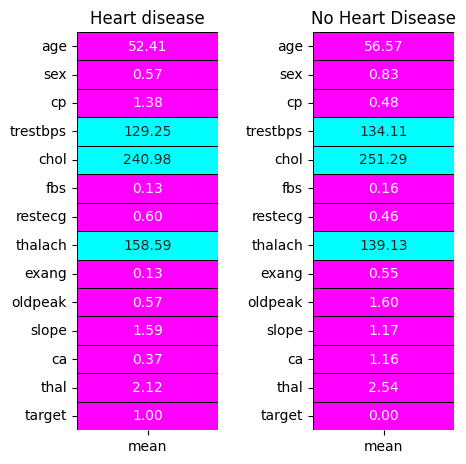

In [6]:
yes = data[data['target'] == 1].describe().T
no = data[data['target'] == 0].describe().T
colors = ['magenta','cyan']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [7]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('No. of Categorical Features :',len(categorical_features))
print('Categorical Features :',*categorical_features)
print('No.of Numerical Features :',len(numerical_features))
print('Numerical Features :',*numerical_features)

No. of Categorical Features : 9
Categorical Features : sex cp fbs restecg exang slope ca thal target
No.of Numerical Features : 5
Numerical Features : age trestbps chol thalach oldpeak


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['sex'] = le.fit_transform(df1['sex'])
df1['cp'] = le.fit_transform(df1['cp'])
df1['fbs'] = le.fit_transform(df1['fbs'])
df1['restecg'] = le.fit_transform(df1['restecg'])
df1['exang'] = le.fit_transform(df1['exang'])
df1['slope'] = le.fit_transform(df1['slope'])
df1['ca'] = le.fit_transform(df1['ca'])
df1['thal'] = le.fit_transform(df1['thal'])

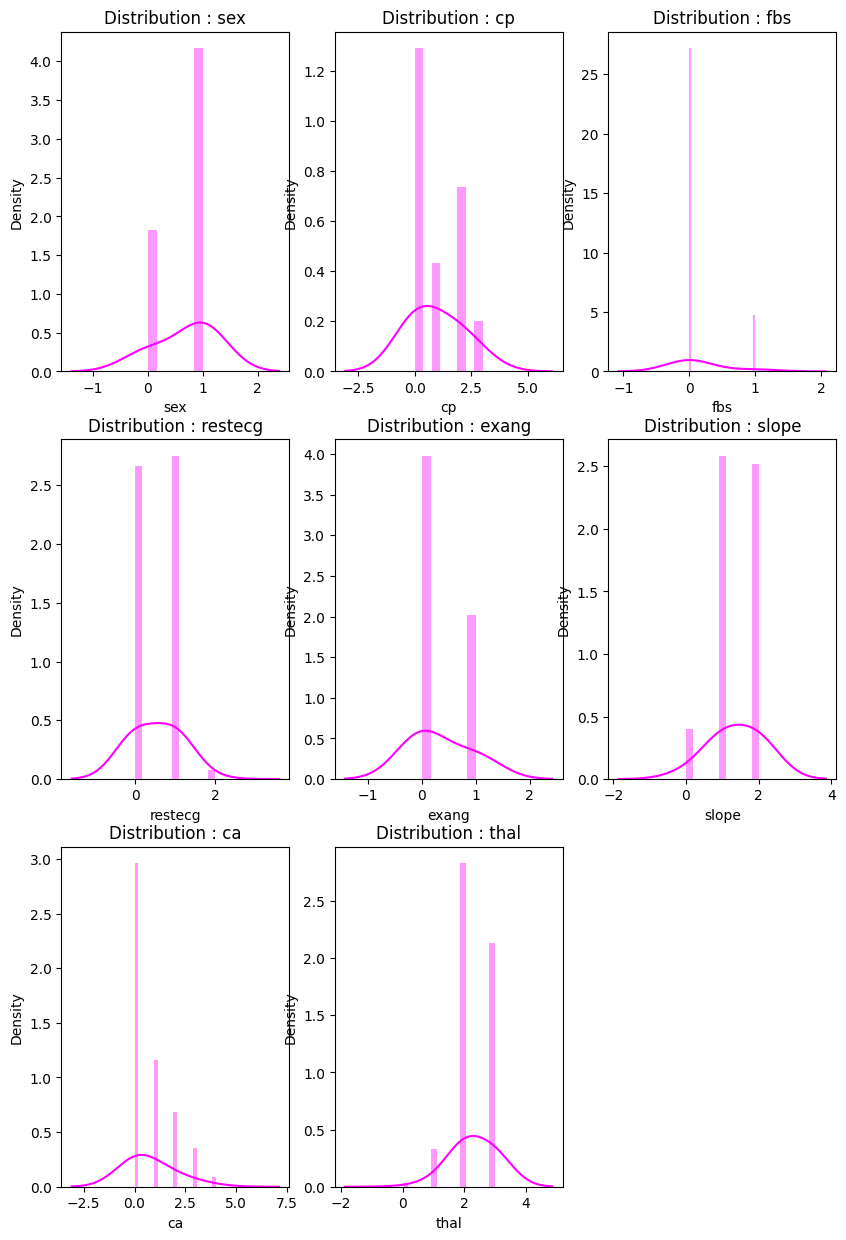

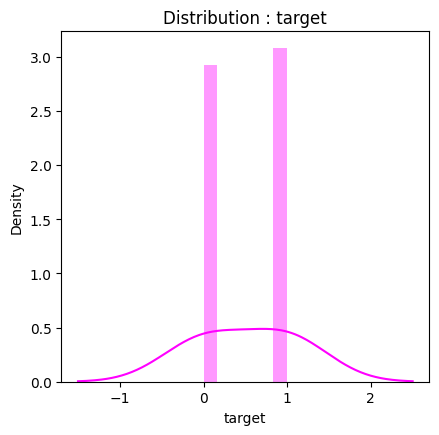

In [9]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,3,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

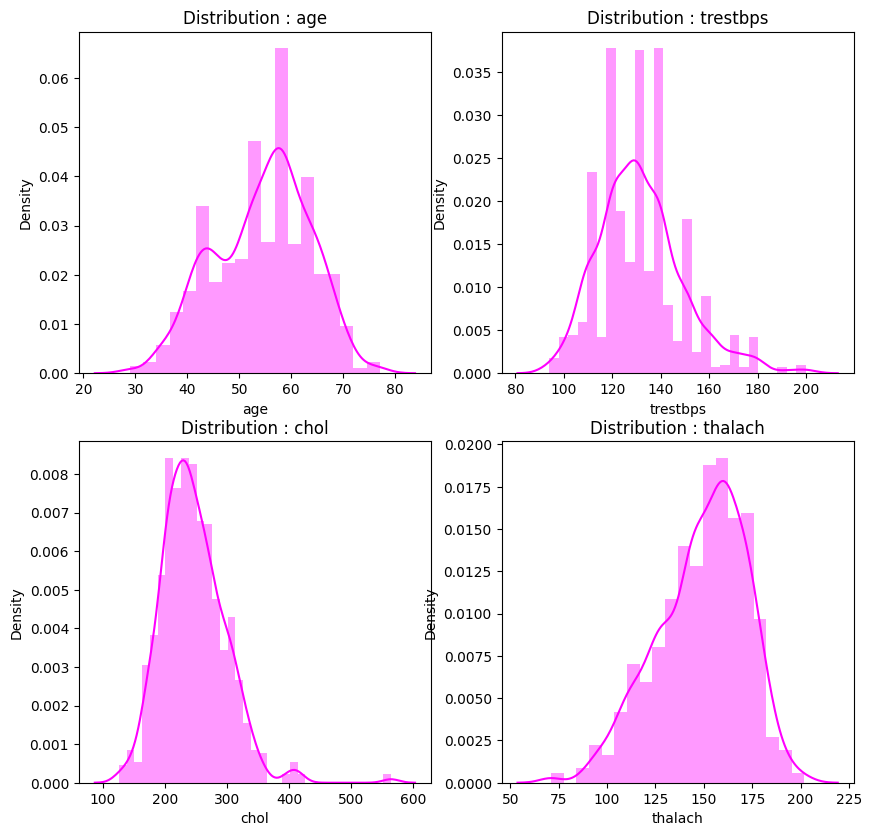

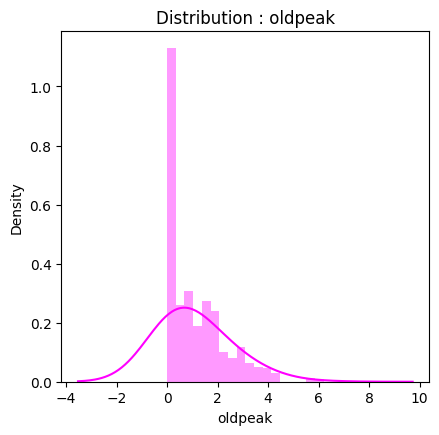

In [10]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

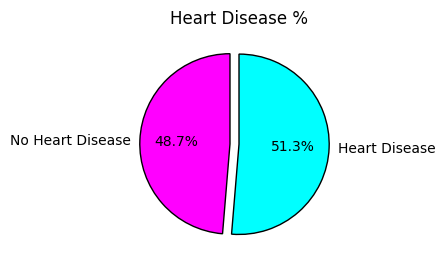

In [11]:
l = list(data['target'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

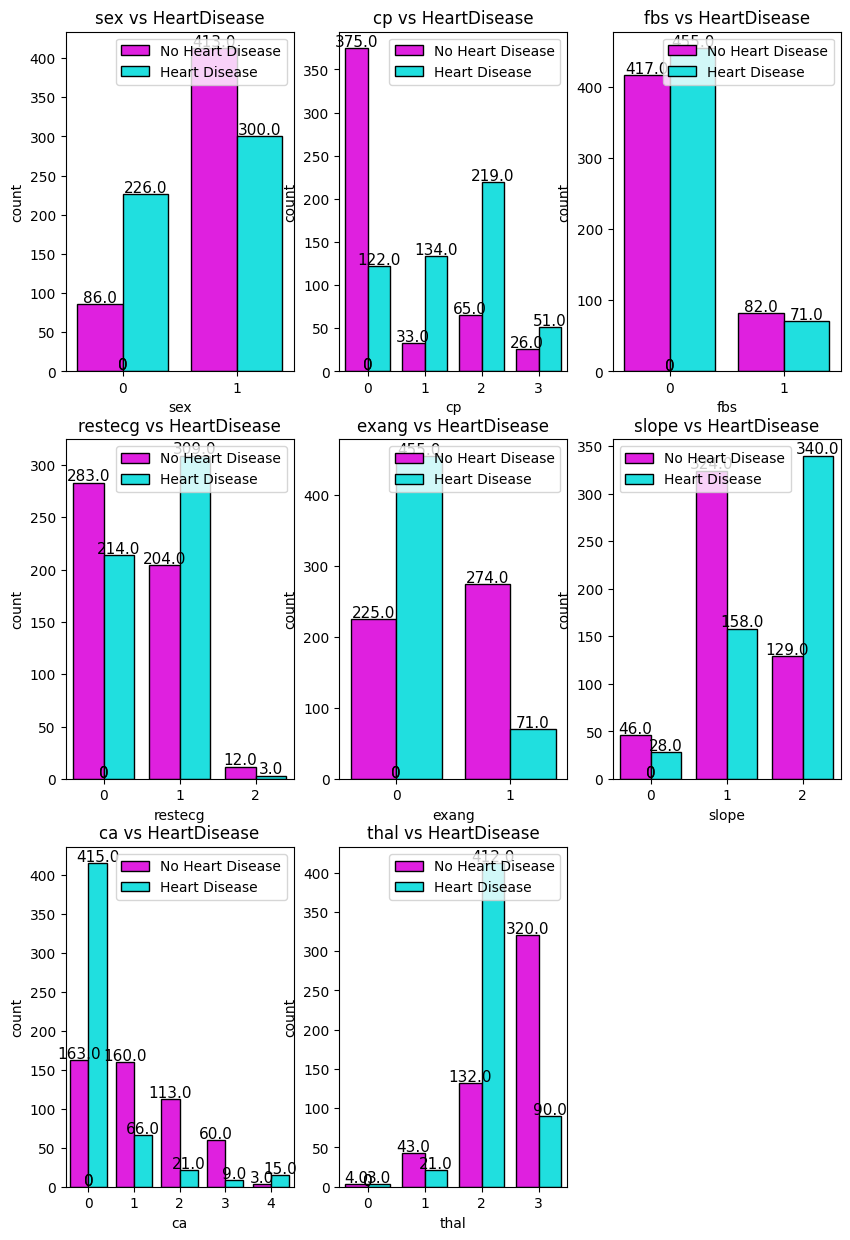

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(x=categorical_features[i], data=data, hue="target", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

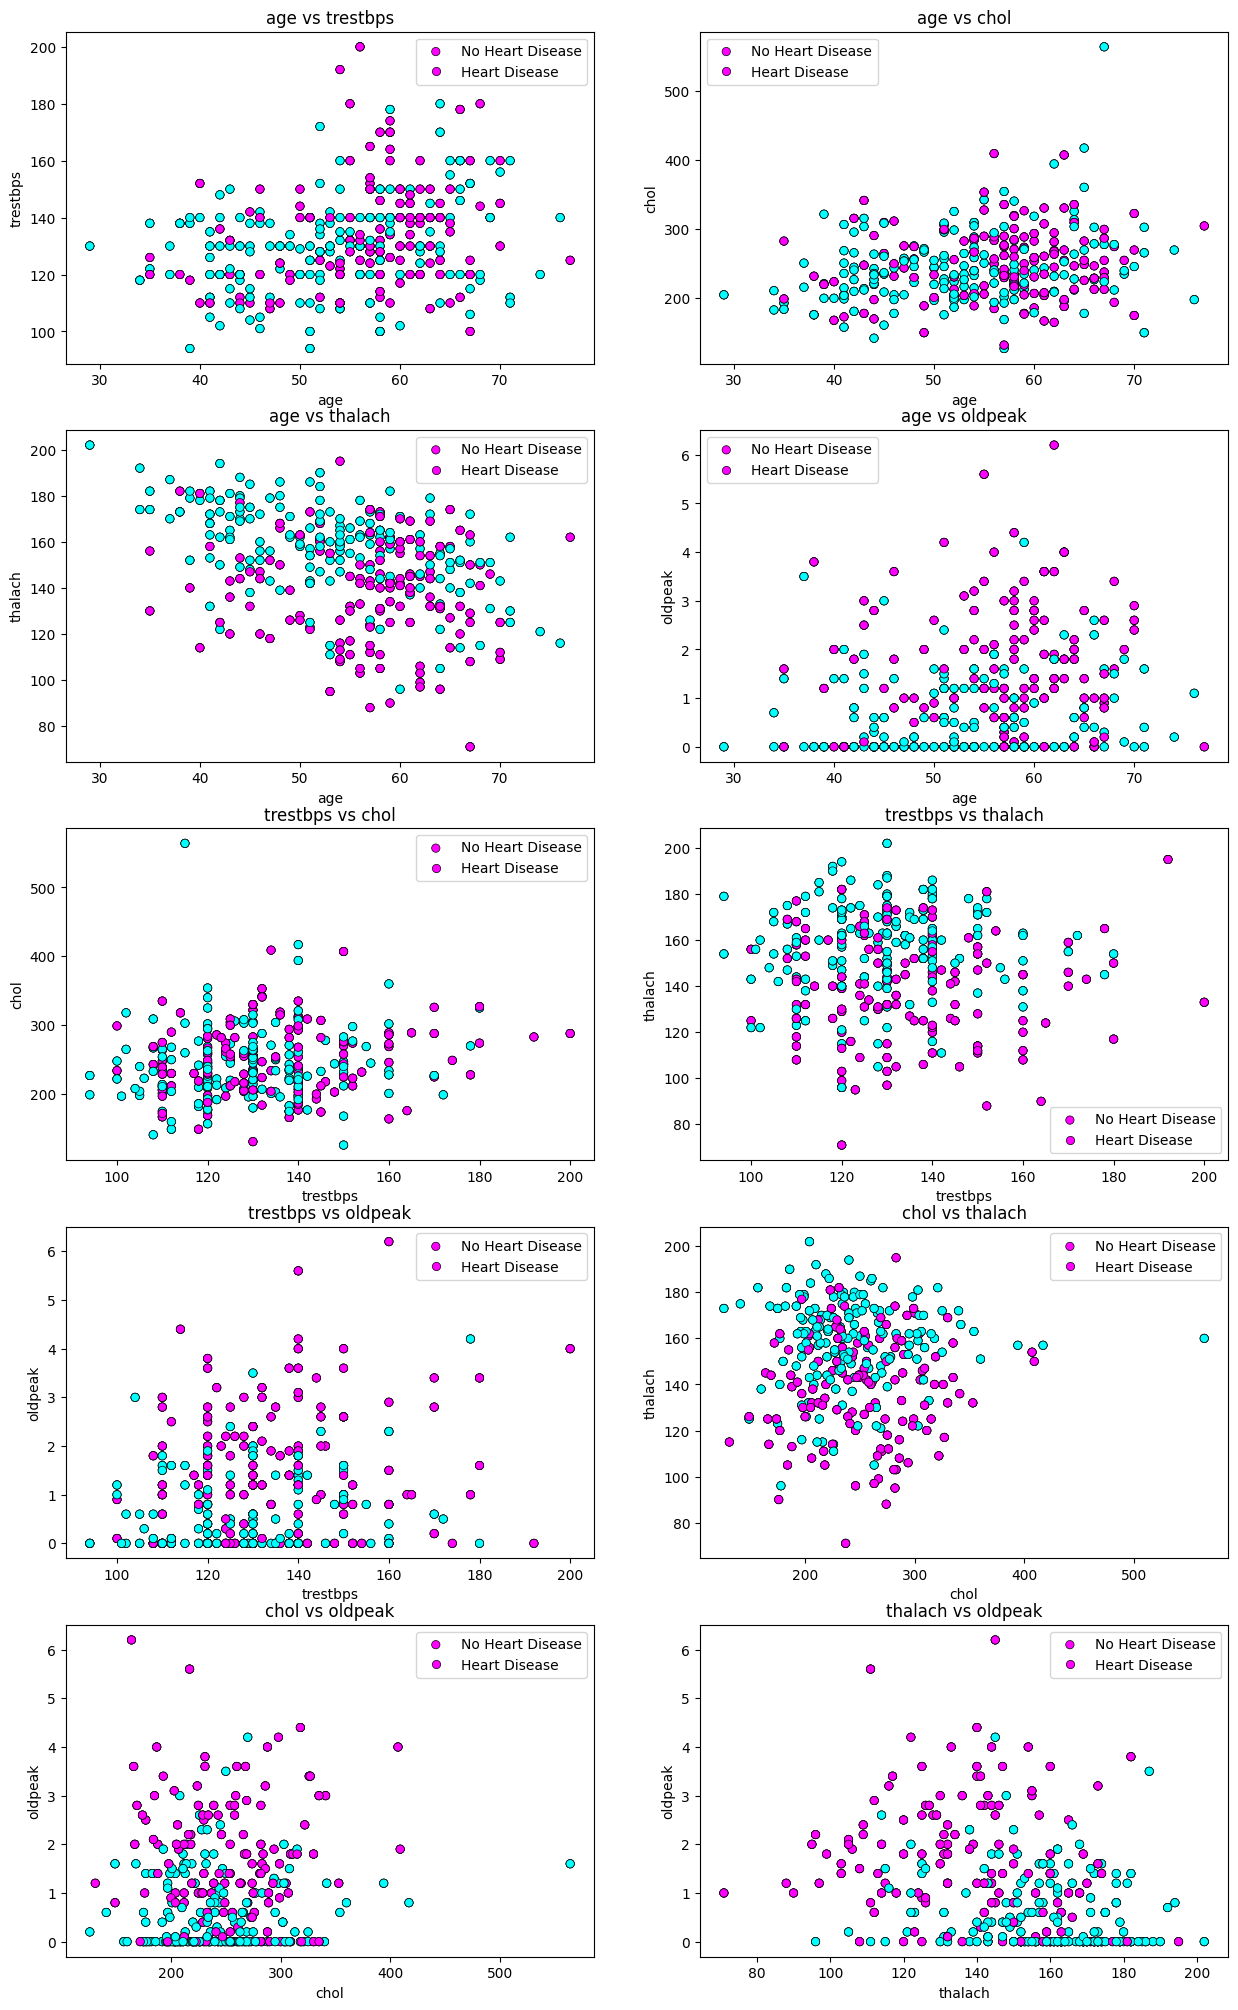

In [13]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'target',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

#**FEATURE SELECTION PROCESS:**

###**1) NORMALIZATION**

In [14]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['oldpeak'] = mms.fit_transform(df1[['oldpeak']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['trestbps'] = ss.fit_transform(df1[['trestbps']])
df1['chol'] = ss.fit_transform(df1[['chol']])
df1['thalach'] = ss.fit_transform(df1[['thalach']])
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.27,1,0,-0.38,-0.66,0,1,0.82,0,0.16,2,2,3,0
1,-0.16,1,0,0.48,-0.83,1,0,0.26,1,0.50,0,0,3,0
2,1.72,1,0,0.76,-1.40,0,1,-1.05,1,0.42,0,0,3,0
3,0.72,1,0,0.94,-0.83,0,1,0.52,0,0.00,2,1,3,0
4,0.83,0,0,0.36,0.93,1,1,-1.87,0,0.31,1,3,2,0


###**2) CORRELATION ANALYSIS**

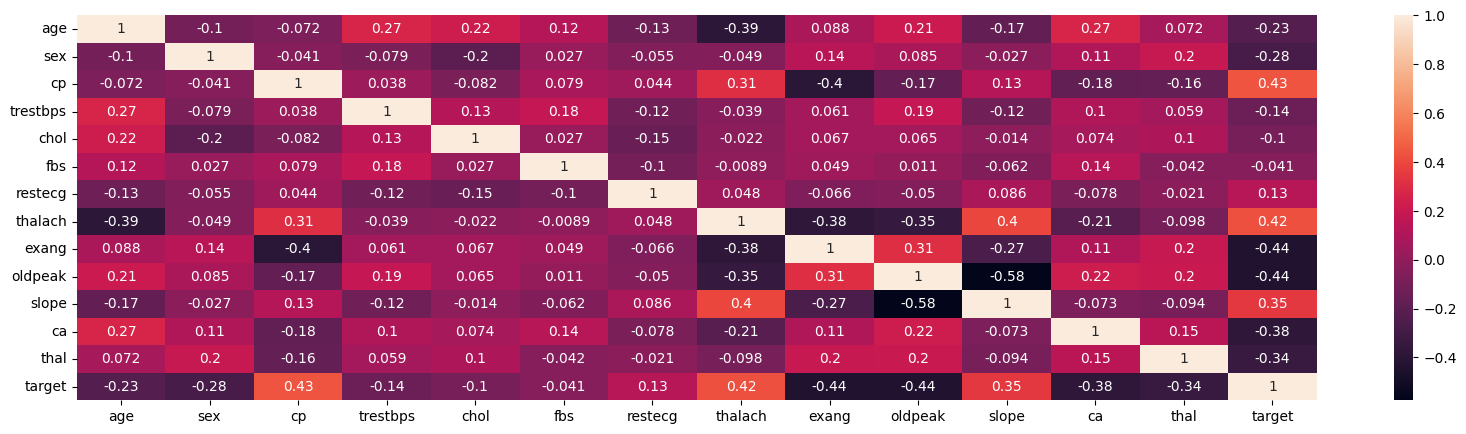

In [15]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),annot = True);

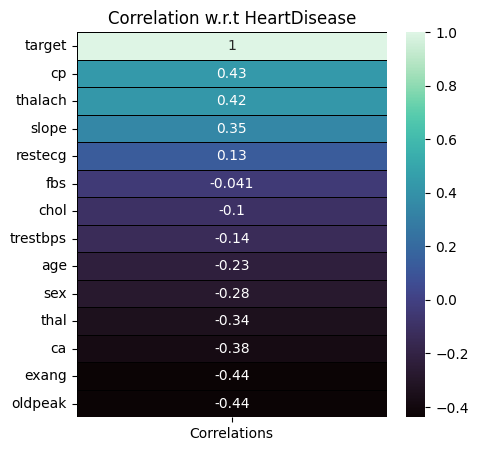

In [16]:
corr = df1.corrwith(df1['target']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'mako',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

###**3) CHI-SQUARE**

Feature sex: P-value = 7.934660597688801e-07, Chi2-statistic = 24.373650078007852

Feature cp: P-value = 2.6980640639297588e-49, Chi2-statistic = 217.82392170607338

Feature fbs: P-value = 0.22415830055790922, Chi2-statistic = 1.4775496219706494

Feature restecg: P-value = 0.0018036539020377341, Chi2-statistic = 9.739342622391584

Feature exang: P-value = 3.232318404569206e-30, Chi2-statistic = 130.47092725153843

Feature slope: P-value = 6.516762727368565e-09, Chi2-statistic = 33.67394806750541

Feature ca: P-value = 1.0030183073912254e-47, Chi2-statistic = 210.6259194910611

Feature thal: P-value = 1.0749029935076443e-05, Chi2-statistic = 19.373464613826698



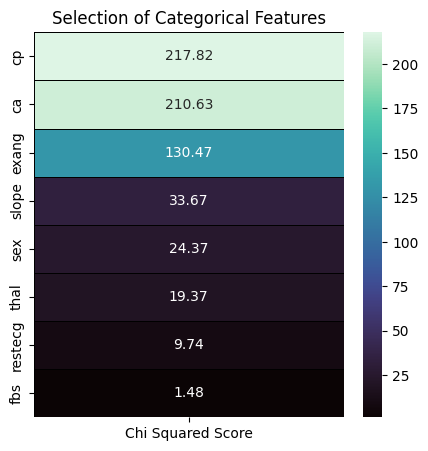

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

scores, pvalues = chi2(features, target)
for i in range(len(scores)):
    print(f"Feature {categorical_features[i]}: P-value = {pvalues[i]}, Chi2-statistic = {scores[i]}\n")

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'mako',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

###**4) ANOVA:**

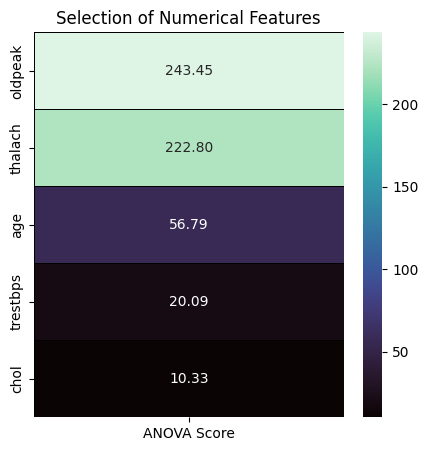

In [18]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = "mako",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

###**5) INFORMATION GAIN:**

   Feature  Information Gain
8   target              0.69
7     thal              0.13
4    exang              0.12
5    slope              0.07
6       ca              0.06
1       cp              0.04
0      sex              0.04
3  restecg              0.01
2      fbs              0.01


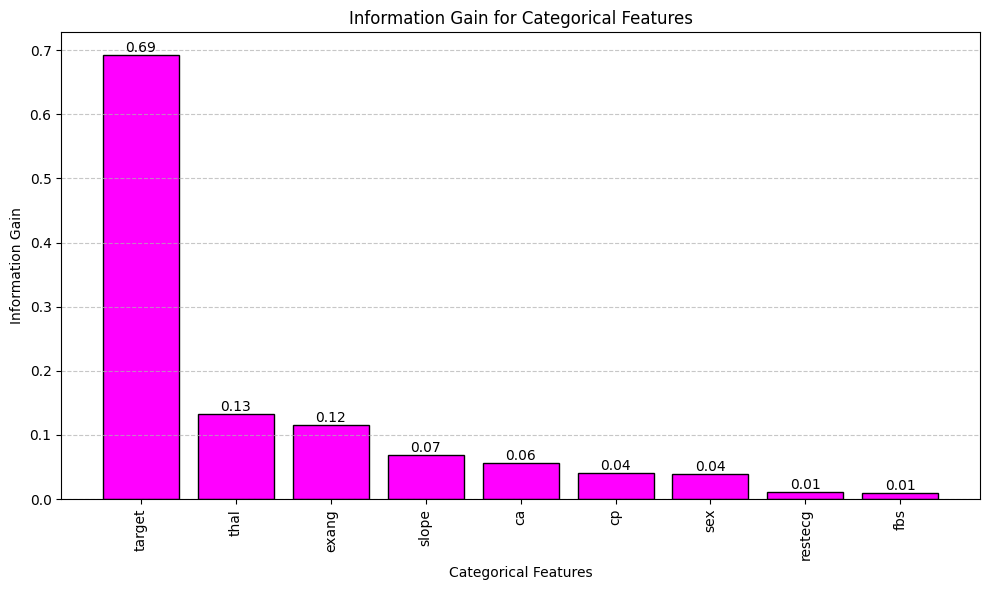

In [19]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Assuming you have a DataFrame named 'df1' with your data
# And 'categorical_features' is a list of column names representing categorical features

# Create a DataFrame to store the information gain values
info_gain_df = pd.DataFrame(columns=['Feature', 'Information Gain'])

# Calculate information gain (mutual information) for each categorical feature
for feature in categorical_features:
    ig = mutual_info_classif(df1[[feature]], df1['target'])[0]
    info_gain_df = info_gain_df.append({'Feature': feature, 'Information Gain': ig}, ignore_index=True)

# Sort the DataFrame by information gain in descending order
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Print the results
print(info_gain_df)
plt.figure(figsize=(10, 6))
plt.bar(info_gain_df['Feature'], info_gain_df['Information Gain'], color='magenta', edgecolor='black')
plt.xlabel('Categorical Features')
plt.ylabel('Information Gain')
plt.title('Information Gain for Categorical Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each bar with the feature name
for i, ig in enumerate(info_gain_df['Information Gain']):
    plt.text(i, ig, round(ig, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()